In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [4]:
dados=pd.read_csv('insurance.csv')

In [5]:
#Verificando as primeiras 5 linhas do conjunto de dados
print(dados.head())
print(dados.shape)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)


In [6]:
print(dados.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [7]:
"""
Vamos modelar a relação entre o bmi e
o custo do seguro para clientes do sexo feminino e que sejam fumantes.
"""
dados = dados[dados['smoker'] == 'yes']
dados =  dados[dados['sex'] == 'female']


X = dados['bmi'].values
Y = dados['charges'].values

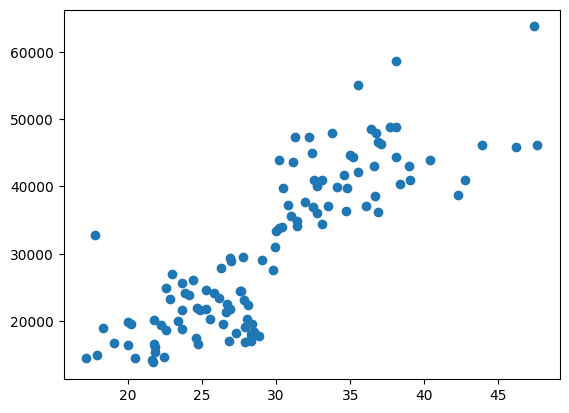

Coeficiente de correlação: PearsonRResult(statistic=0.8459098308542751, pvalue=1.246818485071001e-32)


In [8]:
plt.scatter(X, Y)
plt.show()

r = pearsonr(X, Y)
print(f'Coeficiente de correlação: {r}')

In [9]:
#Separando dados de treino e de teste
#utilizamos 70% dos dados para treino e o restante (30%) para teste.
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.3)

#Precisamos redimensionar os dados para fazer a regressão linear
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [10]:
reg = LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_test)

Text(0, 0.5, 'Custo do Seguro (Dólares)')

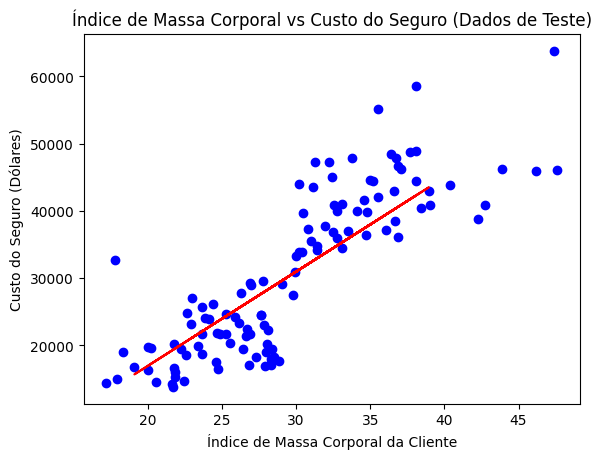

In [11]:
plt.scatter(X, Y, color="blue")
plt.plot(x_test, pred, color="red")
plt.title("Índice de Massa Corporal vs Custo do Seguro (Dados de Teste)")
plt.xlabel("Índice de Massa Corporal da Cliente")
plt.ylabel("Custo do Seguro (Dólares)")

Coeficiente r2: 0.6400758233256232


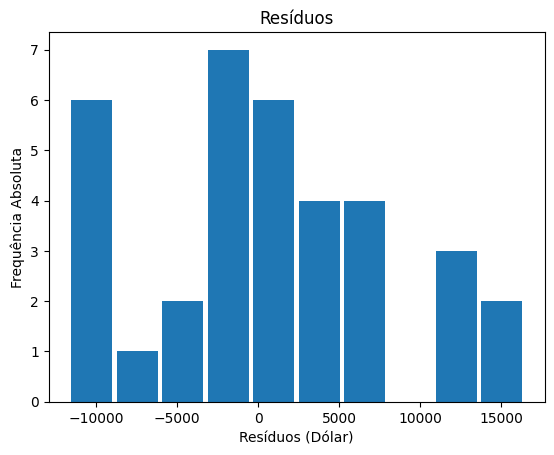

In [12]:
r_squared = r2_score(y_test, pred)
print(f'Coeficiente r2: {r_squared}')

residual = y_test - pred

plt.title('Resíduos')
plt.xlabel('Resíduos (Dólar)')
plt.ylabel('Frequência Absoluta')
plt.hist(residual, rwidth=0.9)
plt.show()